# Arthor: Prisca Ukanwa

# project aim:
## To  predict the number of positive and negative reviews using either classification or deep learning algorithms.

In [1]:

import pandas as pd
import nltk
import numpy as np
import matplotlib.pyplot
import seaborn as sns

In [2]:
df=pd.read_csv(r'C:\Users\USER\Documents\dataset\IMDB Dataset.csv')

In [3]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [4]:
df.shape

(50000, 2)

In [5]:
df.isnull().sum()

review       0
sentiment    0
dtype: int64

In [6]:
df.duplicated().sum()

418

In [7]:
# removing duplicates
df_dup=df.drop_duplicates(inplace=True)

# preprocessing and cleaning

In [8]:
from nltk.tokenize import word_tokenize
import re

<Axes: ylabel='sentiment'>

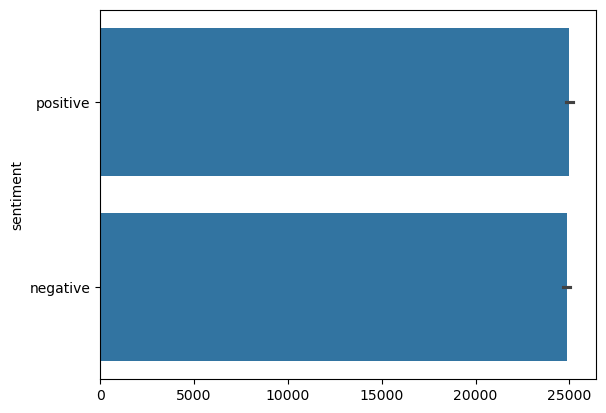

In [9]:
sns.barplot(df['sentiment'])
# virtualizing the target columns

In [10]:
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords

In [11]:
port_stem=PorterStemmer()

In [12]:
print(stopwords.words('english'))

# these are the stop words that dont add meaninfully meaning to text

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', "he'd", "he'll", 'her', 'here', 'hers', 'herself', "he's", 'him', 'himself', 'his', 'how', 'i', "i'd", 'if', "i'll", "i'm", 'in', 'into', 'is', 'isn', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', "i've", 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she

In [13]:

port_stem = PorterStemmer()
import re

In [14]:
stop_words=set(stopwords.words('english'))

In [15]:
def remove_stopword(text):
    return " ".join([word for word in text.split() if word.lower() not in stop_words])


In [16]:
df['stop_review']=df['review'].apply(remove_stopword)

In [17]:
df.head()

,review,sentiment,stop_review
0,One of the other reviewers has mentioned that ...,positive,One reviewers mentioned watching 1 Oz episode ...
1,A wonderful little production. <br /><br />The...,positive,wonderful little production. <br /><br />The f...
2,I thought this was a wonderful way to spend ti...,positive,thought wonderful way spend time hot summer we...
3,Basically there's a family where a little boy ...,negative,Basically there's family little boy (Jake) thi...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,"Petter Mattei's ""Love Time Money"" visually stu..."


In [18]:
# remove special character
def remove_special_characters(text):
    return re.sub(r'[^A-Za-z0-9\s]', '', text)  # Keeps letters, numbers, and spaces

# Example usage
df['stop_review'] = df['review'].apply(remove_special_characters)

In [19]:
df['stop_review']=df['stop_review'].str.replace('br','')

df.head()

In [20]:
from sklearn .model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer

In [21]:
vector=CountVectorizer()

In [22]:
x=df['stop_review']
y=df['sentiment']

In [23]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.5,random_state=42)

In [24]:
x_train_v=vector.fit_transform(x_train)
x_test_v=vector.transform(x_test)

In [25]:
nb=MultinomialNB()
nb.fit(x_train_v,y_train)

MultinomialNB()

In [26]:
nb.score(x_train_v,y_train)

0.912226211125005

In [27]:
ypred=nb.predict(x_test_v)

In [28]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [29]:
print(accuracy_score(y_test,ypred))

0.8466782300028236


In [30]:
cm=confusion_matrix(y_test,ypred)
cm

array([[10776,  1540],
       [ 2261, 10214]], dtype=int64)

<Axes: >

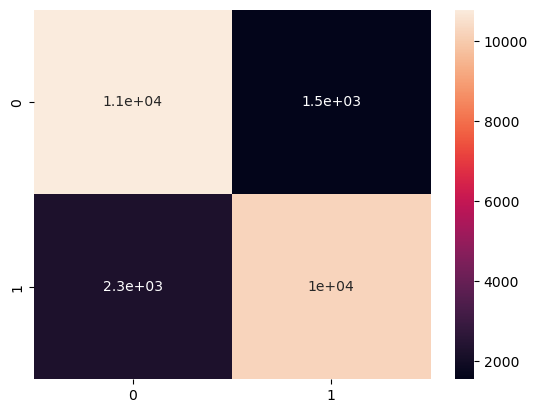

In [31]:
sns.heatmap(cm,annot=True)

# testing another model

In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [33]:
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train_v,y_train)

KNeighborsClassifier(n_neighbors=3)

In [34]:
knn.score(x_train_v,y_train)

0.8062603364124077

In [35]:
pred=knn.predict(x_test_v)

In [36]:
print(accuracy_score(y_test,pred))

0.6126013472631197


In [37]:
# this model isnt doing good

# Prediction

In [38]:
x

0        One of the other reviewers has mentioned that ...
1        A wonderful little production   The filming te...
2        I thought this was a wonderful way to spend ti...
3        Basically theres a family where a little boy J...
4        Petter Matteis Love in the Time of Money is a ...
                               ...                        
49995    I thought this movie did a down right good job...
49996    Bad plot bad dialogue bad acting idiotic direc...
49997    I am a Catholic taught in parochial elementary...
49998    Im going to have to disagree with the previous...
49999    No one expects the Star Trek movies to be high...
Name: stop_review, Length: 49582, dtype: object

In [41]:
h=['Petter Matteis Love in the Time of Money is a ..']

In [42]:
hg=vector.transform(h)

In [43]:
nb.predict(hg)

array(['negative'], dtype='<U8')

In [44]:
# model is predicting right

# Thank you for watching